# 4.5 텐서플로우를 이용한 선형 회귀 예제

이번에는 텐서플로우를 이용해 직접 선형 회귀 예제를 다뤄봅니다.

여기에서는 y = Wx + b 형태의 간단한 선형 회귀 분석 모델을 만들 것입니다. 그러기 위해 이차원 좌표계에 데이터를 생성하는 파이썬 프로그램을 만들고, 텐서플로우를 이용하여 이 샘플 데이터에 들어맞는 최적의 직선을 찾도록 하겠습니다. 

POINT
* 하이퍼파라미터를 설정하는 방법을 확인합니다.
* 선형 회귀로 학습하는 방법을 익힙니다.
* 시각화된 결과로 원래 데이터와 최적화한 직선을 비교합니다.

### 4.5.1. 필요한 모듈 불러오기

텐서플로우 라이브러리와 시각화 라이브러리인 matplotlib.pyplot을 불러 옵니다. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

텐서플로우의 버전을 확인합니다.

In [2]:
tf.__version__

'1.0.1'

### 4.5.2. 하이퍼파라미터 설정하기

예제에서 필요한 학습률 (learning_rate), 학습 횟수 (num_epochs), 진행상태를 출력해 줄 단계 (step_display) 등 하이퍼파라미터를 설정합니다.

In [3]:
learning_rate = 0.01
num_epochs = 1000
step_display = 50

학습률을 반드시 0.01로 설정하라는 법은 없습니다. 하이퍼파라미터의 정의 자체가 정해져 있는 값이 아니라 실험을 통해서 구해야 하는 값이라는 의미입니다. 여기에서는 편의를 위해 적절하다고 생각되는 0.01로 설정한 것입니다. 학습 횟수와 진행상태를 출력해 줄 단계도 마찬가지입니다. 경험상 약 1,000회 정도 학습시키면 적당하다고 생각되며, 매 50번 반복할 때마다 중간 결과를 출력하도록 설정한 것입니다. 

### 4.5.3. 학습에 이용할 데이터 정의

x 좌표와 y 좌표 값을 각각 정의합니다.

In [4]:
x = [2.7, 4.8, 9.3, 13.4, 24.8, 31.3, 48.5, 53.0, 68.1, 74.2, 88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

이때 x와 y의 개수는 같아야 합니다. assert 문을 활용하여 x와 y의 개수가 같지 않으면 에러가 발생하도록 합니다.

len(x) 의 결과로 총 개수는 12개임을 확인할 수 있습니다. 

In [5]:
assert len(x) == len(y)
len(x)

12

텐서플로우에서 대표적인 변수가 바로 가중치와 편향입니다. 따라서 가중치 weight와 편향 bias를 변수로 설정해 줍니다.

tf.random_uniform() 함수는 랜덤한 수치로 초기화를 해 주는데, [1]은 변수의 형태를, -1.0은 최소값, 1.0은 최대값을 의미합니다. 즉 -1.0 ~ 1.0 사이의 스칼라값을 랜덤하게 생성하게 됩니다. 텐서플로우에게 이름을 알려주기 위해 name= 이라는 인자를 이용하여 이름을 명시해 줍니다. 

In [6]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='bias')

모델을 학습시킬 때 x 좌표와 y 좌표를 피드해 줄 플레이스홀더를 정의해 줍니다. 위에서 가중치와 편향은 변수로 정의했기 때문에 텐서플로우의 컴퓨테이션 그래프가 구축될 때 메모리에 올라가게 됩니다. 플레이스홀더는 그래프 구축 시에는 메모리에 올라가지 않고, 그래프가 실제 실행될 때 피드되면서 메모리에 올라가게 됩니다. 

In [7]:
x_true = tf.placeholder(dtype=tf.float32, name='x_true')
y_true = tf.placeholder(dtype=tf.float32, name='y_true')

### 4.5.4. 그래프 만들기

예측값인 y_pred 를 weight 와 x_true 의 곱에 bias 를 더해 준 값으로 정의합니다. 

In [8]:
y_pred = tf.add(tf.multiply(weight,x_true), bias)

예측값인 y_pred 에서 실제값인 y_true 를 뺀 값에 제곱을 취한 다음에 평균해 준 값이 비용 (cost 또는 loss) 이 됩니다. 

In [9]:
cost = tf.reduce_mean(tf.square(y_pred - y_true))

비용이 최소화되게 할 optimizer를 정의해 줍니다. 

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### 4.5.5. 학습 시작하기

세션을 실행하고, 변수를 초기화합니다. 텐서플로우에서는 세션 실행 시 반드시 모든 글로벌 변수를 초기화해 주어야 합니다. 

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

학습을 시작합니다. 
* 1,000번 학습을 진행합니다. 
* optimizer와 cost를 실행하기 위해 x 좌표와 y 좌표를 피드해 줍니다. 
* 50번마다 중간 결과값들을 출력해 줍니다 - epoch, cost, weight, bias를 출력합니다.

In [12]:
for epoch in xrange(num_epochs):
    _, c = sess.run([optimizer,cost], feed_dict={x_true: x, y_true: y})
    if (epoch+1) % step_display == 0:
        print "Epoch: {0}, cost: {1}, weight: {2}, bias: {3}".format(epoch+1, c, sess.run(weight), sess.run(bias))

print("최적화 작업이 완료되었습니다.")

Epoch: 50, cost: 25817.6855469, weight: [ 0.11223935], bias: [ 0.56423664]
Epoch: 100, cost: 18603.4082031, weight: [ 0.56743193], bias: [ 1.01983941]
Epoch: 150, cost: 13100.9501953, weight: [ 0.98087525], bias: [ 1.43414211]
Epoch: 200, cost: 9023.57519531, weight: [ 1.35100031], bias: [ 1.80566621]
Epoch: 250, cost: 6096.41015625, weight: [ 1.67703438], bias: [ 2.13373184]
Epoch: 300, cost: 4066.41210938, weight: [ 1.95911658], bias: [ 2.4185586]
Epoch: 350, cost: 2710.0715332, weight: [ 2.19842839], bias: [ 2.66139841]
Epoch: 400, cost: 1838.9732666, weight: [ 2.39722323], bias: [ 2.86455297]
Epoch: 450, cost: 1302.22106934, weight: [ 2.55873227], bias: [ 3.03127766]
Epoch: 500, cost: 985.349304199, weight: [ 2.68695927], bias: [ 3.16557097]
Epoch: 550, cost: 806.306335449, weight: [ 2.78638506], bias: [ 3.27188945]
Epoch: 600, cost: 709.540588379, weight: [ 2.86165214], bias: [ 3.35483432]
Epoch: 650, cost: 659.535583496, weight: [ 2.91726899], bias: [ 3.41886497]
Epoch: 700, cost

In [13]:
training_cost = sess.run(cost, feed_dict={x_true: x, y_true: y})
print "최종 cost: {}".format(c)
print "최종 weight: {}".format(sess.run(weight)) 
print "최종 bias: {}".format(sess.run(bias))

최종 cost: 614.095397949
최종 weight: [ 3.03490973]
최종 bias: [ 3.61217713]


### 4.5.6. 그래프 시각화로 직선 비교하기 

* x 좌표와 y 좌표를 이용해 빨간색의 동그라미 형태로 점들을 찍어 줍니다. ('ro'에서 r은 빨간색을, o는 동그라미를 의미합니다)
* 학습의 결과로 얻은 최적화된 선을 그려 줍니다. 
* 범례 (legend) 를 보여줍니다
* 시각화된 그래프를 출력합니다

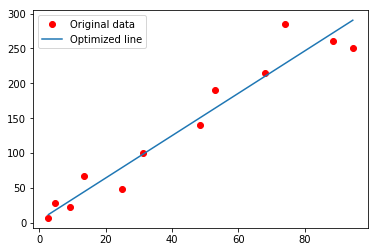

In [14]:
plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, sess.run(weight) * x + sess.run(bias), label='Optimized line') 
plt.legend() 
plt.show()

세션을 닫아 줍니다. 

In [15]:
sess.close()

이렇게 선형 회귀 예제를 살펴보았습니다. 간단한 예제지만 랜덤한 좌표들에 대해 학습한 결과, 최적화된 선을 얻을 수 있었습니다. 이처럼 선형 회귀를 통해 간단한 경우에 대해 추이를 예측하는 것이 가능합니다. 대표적인 예로는 아파트의 평수에 따른 아파트 매매가의 예측, 유동인구에 따른 상가 임대료 예측 등이 있습니다. 